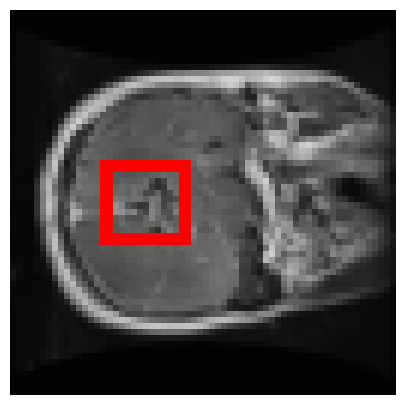

In [26]:
import importlib
import preprocessing
importlib.reload(preprocessing)
from preprocessing import *


train_loader,val_loader=create_dataloader((64,64),batch_size=128)



In [46]:
class DiceLoss(nn.Module):
    def __init__(self, smooth=1e-6):
        super(DiceLoss, self).__init__()
        self.smooth = smooth

    def forward(self, inputs, targets):
        # Flatten the tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)
        
        # Calculate intersection and union
        intersection = (inputs * targets).sum()
        dice = (2. * intersection + self.smooth) / (inputs.sum() + targets.sum() + self.smooth)
        
        return 1 - dice

In [36]:
#PyTorch
class DiceBCELoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceBCELoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):
        
        #comment out if your model contains a sigmoid or equivalent activation layer
        inputs = F.sigmoid(inputs)       
        
        #flatten label and prediction tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)
        
        intersection = (inputs * targets).sum()                            
        dice_loss = 1 - (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)  
        BCE = F.binary_cross_entropy(inputs, targets, reduction='mean')
        Dice_BCE = BCE + dice_loss
        
        return Dice_BCE

In [47]:
import torch
import train 
importlib.reload(train)
from train import training_loop


    

model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=3, out_channels=1, init_features=32, pretrained=True)


# Define the optimizer and loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0005)
loss_fn= DiceLoss()
unet_metrics=training_loop(model, optimizer, loss_fn, train_loader, val_loader, num_epochs=3)
# Train the model


Using cache found in /Users/anton_heden/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master


Starting training


100%|██████████| 12/12 [01:21<00:00,  6.78s/it]


Epoch 1/3: Train loss: 0.829, Train f1.: 0.144, Train accuracy: 0.895, Val. loss: 0.779, Val. f1.: 0.182 Val. accuracy: 0.902


100%|██████████| 12/12 [01:21<00:00,  6.82s/it]


Epoch 2/3: Train loss: 0.546, Train f1.: 0.407, Train accuracy: 0.938, Val. loss: 0.564, Val. f1.: 0.384 Val. accuracy: 0.937


100%|██████████| 12/12 [01:19<00:00,  6.59s/it]


Epoch 3/3: Train loss: 0.443, Train f1.: 0.511, Train accuracy: 0.954, Val. loss: 0.451, Val. f1.: 0.502 Val. accuracy: 0.954


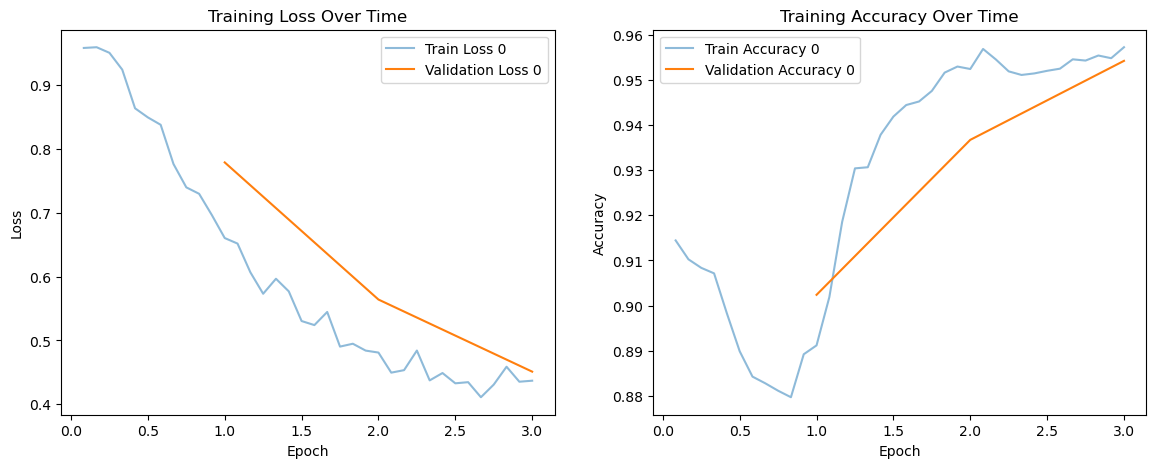

In [48]:
import visualisation
importlib.reload(visualisation)
from visualisation import *
save_model_to_file(unet_metrics, 'unet_brain_mri_seg.pth')


plot_training([unet_metrics])

0.0


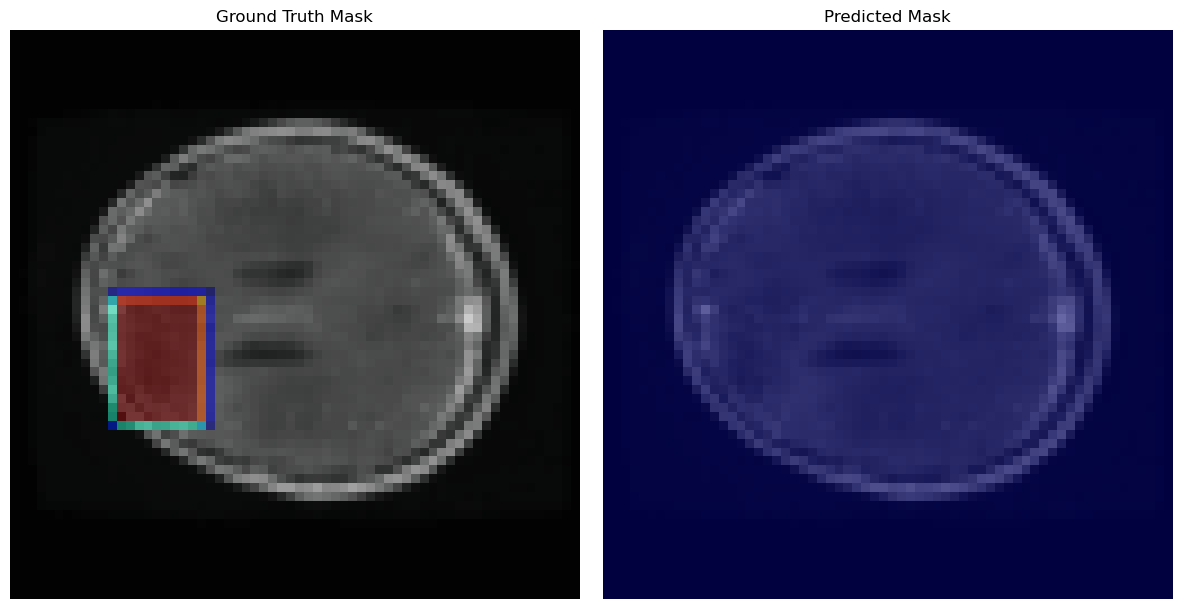

In [49]:
import visualisation
importlib.reload(visualisation)
from visualisation import *
# Load the model and performance metrics
model, train_losses, train_accs, val_losses, val_accs = get_model_and_performance_metrics("unet_brain_mri_seg.pth", model)


# Get the validation dataset
val_dataset = val_loader.dataset

# Plot comparison for a specific index
plot_comparison(0, val_dataset, model)